## 영국 감가상각율
영국 감가상각 시계열 데이터 (월간: 1993 - 2023)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
sns.set_style('white')
from matplotlib.ticker import FuncFormatter
from scipy.signal import savgol_filter


In [2]:
from plotly.offline import init_notebook_mode, iplot, plot

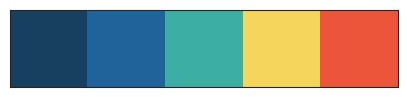

In [3]:
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

### Define the colour scheme
c1 = "#173f5f"
c2 = "#20639b"
c3 = "#3caea3"
c4 = "#f6d55c"
c5 = "#ed553b"

custom_palette = [c1, c2, c3, c4, c5]
sns.palplot(sns.color_palette(custom_palette))

In [4]:
df = pd.read_csv('/home/leejieun/workspace/kaggle-notebooks/datasets/liamhealy/uk-write-off-timeseries-data/UK Write-Off Data.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['secured_lending'] = df['RPQTFHD'] / df['RPQB73D']
df['credit_cards'] = df['RPQTFHE'] / df['RPQB74D']
df['other_unsecured_lending'] = df['RPQTFHF'] / df['RPQB75D']

In [5]:
df = df.drop(['RPQTFHD','RPQB73D','RPQTFHE','RPQB74D','RPQTFHF','RPQB75D','RPQTFHG'], axis=1)

In [6]:
df

,Date,secured_lending,credit_cards,other_unsecured_lending
0,2023-09-30,0.000006,0.005361,0.003271
1,2023-06-30,0.000009,0.005876,0.003140
2,2023-03-31,0.000009,0.005904,0.002960
3,2022-12-31,-0.000003,0.007824,0.007004
4,2022-09-30,0.000011,0.006139,0.003854
...,...,...,...,...
118,1994-03-31,0.000885,0.004640,0.007221
119,1993-12-31,0.000694,0.004300,0.009712
120,1993-09-30,0.000806,0.006223,0.005989
121,1993-06-30,0.000721,0.016719,0.005591


In [7]:
df.shape

(123, 4)

In [8]:
df.describe()

,Date,secured_lending,credit_cards,other_unsecured_lending
count,123,123.000000,123.000000,123.000000
mean,2008-06-30 04:52:40.975609856,0.000136,0.009207,0.006271
min,1993-03-31 00:00:00,-0.000003,0.001692,0.001734
25%,2000-11-15 00:00:00,0.000029,0.005608,0.004264
50%,2008-06-30 00:00:00,0.000079,0.007356,0.005691
75%,2016-02-14 12:00:00,0.000173,0.011243,0.007249
max,2023-09-30 00:00:00,0.000885,0.037943,0.020674
std,NaN,0.000164,0.005965,0.002981


In [9]:
df.head()

,Date,secured_lending,credit_cards,other_unsecured_lending
0,2023-09-30,0.000006,0.005361,0.003271
1,2023-06-30,0.000009,0.005876,0.003140
2,2023-03-31,0.000009,0.005904,0.002960
3,2022-12-31,-0.000003,0.007824,0.007004
4,2022-09-30,0.000011,0.006139,0.003854


In [10]:
df.isnull().sum()

Date                       0
secured_lending            0
credit_cards               0
other_unsecured_lending    0
dtype: int64

In [11]:
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

In [12]:
df.head()

,secured_lending,credit_cards,other_unsecured_lending
Date,,,
1993-03-31,0.000465,0.001692,0.008323
1993-06-30,0.000721,0.016719,0.005591
1993-09-30,0.000806,0.006223,0.005989
1993-12-31,0.000694,0.004300,0.009712
1994-03-31,0.000885,0.004640,0.007221


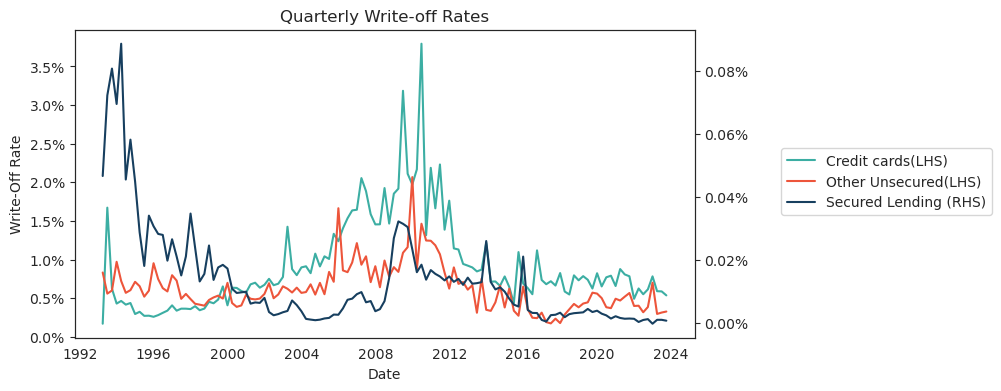

In [22]:
fig, ax = plt.subplots(figsize=(8,4), ncols=1, nrows=1)
ax.plot(df.index, df['credit_cards'], color=c3, label='Credit cards(LHS)')
ax.plot(df.index, df['other_unsecured_lending'], color =c5, label = 'Other Unsecured(LHS)')

ax2 = ax.twinx() # x 축 공유
ax2.plot(df.index, df['secured_lending'], color=c1, label='Secured Lending (RHS)')

ax.set(title='Quarterly Write-off Rates', xlabel='Date', ylabel='Write-Off Rate')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
plt.show()

In [23]:
df.columns

Index(['secured_lending', 'credit_cards', 'other_unsecured_lending'], dtype='object')